<a href="https://colab.research.google.com/github/Leningc/trabajo_enca1/blob/master/Tarea_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%%capture
!pip install netcdf4

In [3]:
%%capture
!pip install geopandas
!pip install rioxarray

In [4]:
import rioxarray
from geopandas import read_file as gpd_read_file
import geopandas as gpd

In [5]:
%%capture
!pip install geopandas
!pip install rioxarray

In [6]:
import rioxarray
from geopandas import read_file as gpd_read_file

In [7]:
import matplotlib.pyplot as plt

In [8]:
import xarray as xr
import pandas as pd
import numpy as np

In [9]:
pisco = xr.open_dataset("/content/drive/MyDrive/PISCOp.nc")
pisco

<xarray.Dataset>
Dimensions:  (T: 13149, Y: 198, X: 133)
Coordinates:
  * T        (T) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-31T12:00:00
  * Y        (Y) float32 0.95 0.85 0.75 0.65 ... -18.45 -18.55 -18.65 -18.75
  * X        (X) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
Data variables:
    Prec     (T, Y, X) float32 ...

In [10]:
pisco1=pisco.rename({"T":"time","Y":"latitude","X":"longitude"})
pisco1

<xarray.Dataset>
Dimensions:    (time: 13149, latitude: 198, longitude: 133)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-31T12:00:00
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [11]:
pisco_temp= xr.open_dataset("/content/drive/MyDrive/PISCOdtn_v1.1.nc")
pisco_temp

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 13149)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2016-12-31
Data variables:
    tn         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:22:37 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:17
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [12]:
#pisco_temp=pisco_temp.rename({"latitude":"latitud","longitude":"longitud"})
#pisco_temp

# **NIÑO**

In [13]:
#PRECIPIT
#filtro
filtro1=pisco1.sel(time=slice('1983-01-01T12:00:00.000000000','1985-01-01T12:00:00.000000000'))
filtro1

<xarray.Dataset>
Dimensions:    (time: 732, latitude: 198, longitude: 133)
Coordinates:
  * time       (time) datetime64[ns] 1983-01-01T12:00:00 ... 1985-01-01T12:00:00
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [14]:
prec_niño=filtro1.resample(time="1Y").sum()
prec_niño

<xarray.Dataset>
Dimensions:    (latitude: 198, longitude: 133, time: 3)
Coordinates:
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 1983-12-31 1984-12-31 1985-12-31
Data variables:
    Prec       (time, latitude, longitude) float32 0.0 0.0 0.0 ... 1.145 1.021

In [15]:
#TEMP_MIN_MAX
filtro_temp_niño=pisco_temp.sel(time=slice('1983-01-01T12:00:00.000000000','1985-01-01T12:00:00.000000000'))
filtro_temp_niño

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 731)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1983-01-02 1983-01-03 ... 1985-01-01
Data variables:
    tn         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:22:37 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:17
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [16]:
#TEM_MIN
tmin_niño=filtro_temp_niño.resample(time="1Y").min()
tmin_niño

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 3)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1983-12-31 1984-12-31 1985-12-31
Data variables:
    tn         (time, latitude, longitude) float32 nan nan nan ... 4.315 4.536
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:22:37 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:17
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [17]:
#TEM_MAX
tmax_niño=filtro_temp_niño.resample(time="1Y").max()
tmax_niño

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 3)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1983-12-31 1984-12-31 1985-12-31
Data variables:
    tn         (time, latitude, longitude) float32 nan nan nan ... 4.315 4.536
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:22:37 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:17
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

# **NIÑA**

In [18]:
#PRECIPIT
#filtro
filtro1=pisco1.sel(time=slice('1995-01-01T12:00:00.000000000','1997-01-01T12:00:00.000000000'))
filtro1

<xarray.Dataset>
Dimensions:    (time: 732, latitude: 198, longitude: 133)
Coordinates:
  * time       (time) datetime64[ns] 1995-01-01T12:00:00 ... 1997-01-01T12:00:00
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [19]:
prec_niña=filtro1.resample(time="1Y").sum()
prec_niña

<xarray.Dataset>
Dimensions:    (latitude: 198, longitude: 133, time: 3)
Coordinates:
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 1995-12-31 1996-12-31 1997-12-31
Data variables:
    Prec       (time, latitude, longitude) float32 0.0 0.0 0.0 ... 3.743 3.421

In [20]:
#TEMP_MIN_MAX
filtro_temp_niña=pisco_temp.sel(time=slice('1995-01-01T12:00:00.000000000','1997-01-01T12:00:00.000000000'))
filtro_temp_niña

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 731)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1995-01-02 1995-01-03 ... 1997-01-01
Data variables:
    tn         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:22:37 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:17
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [21]:
#TEM_MIN
#tmin_niña=filtro_temp_niña.resample(time="1Y").min()
valores_minimos_ña = filtro_temp_niña.sel(time=filtro_temp_niña.time.dt.year.isin([1995, 1996])).min(dim="time")
valores_minimos_ña

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
Data variables:
    tn         (latitude, longitude) float32 nan nan nan ... -11.48 -7.402

In [22]:
#TEM_MAX
tmax_niña=filtro_temp_niña.resample(time="1Y").max()
tmax_niña

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 3)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1995-12-31 1996-12-31 1997-12-31
Data variables:
    tn         (time, latitude, longitude) float32 nan nan nan ... 2.435 2.741
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:22:37 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:17
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

# ***NORMAL***

In [23]:
#PREC
filtro2=pisco1.sel(time=slice('2001-01-01T12:00:00.000000000','2003-01-01T12:00:00.000000000'))
filtro2

<xarray.Dataset>
Dimensions:    (time: 731, latitude: 198, longitude: 133)
Coordinates:
  * time       (time) datetime64[ns] 2001-01-01T12:00:00 ... 2003-01-01T12:00:00
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [24]:
prec_normal=filtro2.resample(time="1Y").sum()
prec_normal

<xarray.Dataset>
Dimensions:    (latitude: 198, longitude: 133, time: 3)
Coordinates:
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 2001-12-31 2002-12-31 2003-12-31
Data variables:
    Prec       (time, latitude, longitude) float32 0.0 0.0 0.0 ... 10.43 10.22

In [25]:
#TEMP_MIN_MAX
filtro_temp_normal=pisco_temp.sel(time=slice('2001-01-01T12:00:00.000000000','2003-01-01T12:00:00.000000000'))
filtro_temp_normal

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 730)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 2001-01-02 2001-01-03 ... 2003-01-01
Data variables:
    tn         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:22:37 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:17
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [26]:
#TEM_MIN
tmin_normal=filtro_temp_normal.resample(time="1Y").min()
tmin_normal

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 3)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 2001-12-31 2002-12-31 2003-12-31
Data variables:
    tn         (time, latitude, longitude) float32 nan nan nan ... 4.839 5.074
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:22:37 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:17
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [27]:
#TEM_MAX
tmax_normal=filtro_temp_normal.resample(time="1Y").max()
tmax_normal

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 3)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 2001-12-31 2002-12-31 2003-12-31
Data variables:
    tn         (time, latitude, longitude) float32 nan nan nan ... 4.839 5.074
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:22:37 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:17
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

# ***RESTA***

<Axes: >

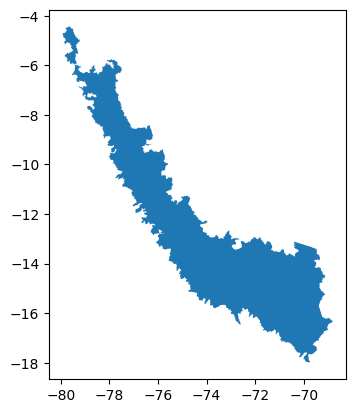

In [28]:
# Cargar el shapefile de las regiones del Perú
shp_Peru_regiones = gpd.read_file('/content/drive/MyDrive/region natural_geogpsperu_JuanPabloSuyoPomalia.shp')

# Filtrar las regiones solo para la sierra
sierra = shp_Peru_regiones[shp_Peru_regiones['Nm_RegNat'] == 'Sierra']

# Crear el gráfico
fig, ax = plt.subplots()

# Graficar solo las regiones de la sierra
sierra.plot(ax=ax)

# Mostrar el gráfico
#plt.show()

In [29]:
import os

os.environ['SHAPE_RESTORE_SHX'] = 'YES'


In [30]:
shp_Peru = gpd.GeoDataFrame.from_file('/content/drive/MyDrive/Copia de Departamentos.shp')
shp_Peru#.plot()

,geometry
0,"POLYGON ((-77.71584 -5.10859, -77.71561 -5.108..."
1,"POLYGON ((-77.43826 -8.41625, -77.43879 -8.419..."
2,"POLYGON ((-73.51174 -13.38481, -73.50822 -13.3..."
3,"POLYGON ((-71.89395 -14.78905, -71.89342 -14.7..."
4,"POLYGON ((-73.74697 -13.75935, -73.74495 -13.7..."
5,"POLYGON ((-78.68236 -7.39208, -78.68268 -7.392..."
6,"MULTIPOLYGON (((-77.22816 -12.06813, -77.22681..."
7,"POLYGON ((-70.86265 -13.80001, -70.86680 -13.8..."
8,"POLYGON ((-75.52429 -13.81763, -75.52566 -13.8..."
9,"POLYGON ((-76.23089 -10.37179, -76.23136 -10.3..."


<Axes: >

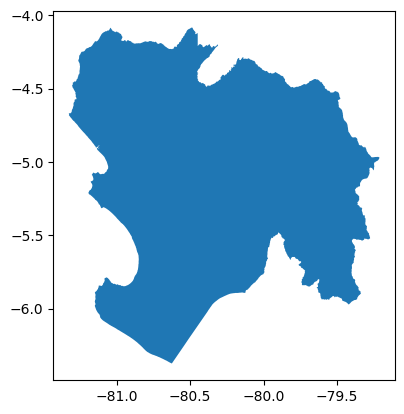

In [31]:
#PIURA
shp_exp_piura = shp_Peru.iloc[[19]]
shp_exp_piura.plot()

In [32]:
reindex_prec_normal= prec_normal.reindex_like(prec_niño,method="nearest") #reindexando-normal en niño
reindex_prec_normal= xr.where(np.isnan(prec_niño), -9999, reindex_prec_normal)

resta_prec_niño=((prec_niño-reindex_prec_normal)/reindex_prec_normal)*100 #var porcentual
resta_prec_niño

<xarray.Dataset>
Dimensions:    (latitude: 198, longitude: 133, time: 3)
Coordinates:
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 1983-12-31 1984-12-31 1985-12-31
Data variables:
    Prec       (time, latitude, longitude) float32 nan nan nan ... -99.78 -99.8

ValueError: ignored

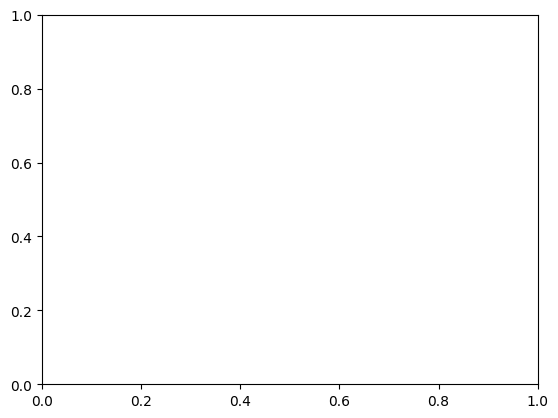

In [33]:
variable = resta_prec_niño['Prec']

# Obtener las coordenadas de latitud y longitud
latitudes = resta_prec_niño['latitude']
longitudes = resta_prec_niño['longitude']

# Agregar etiquetas a las dimensiones latitud y longitud
variable = variable.assign_coords(lat=latitudes, lon=longitudes)

# Graficar la variable en función de la latitud y la longitud
plt.plot(variable['lon'], variable['lat'])

# Configurar los ejes y el título
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Gráfico de línea')

# Mostrar el gráfico
plt.show()

In [ ]:
#NIÑO PREC NORMAL
def xr_crop(shp_i, netcdf_i):

  # get box
  box_i = shp_exp_piura.total_bounds

  # crop based on box
  crop_netcdf_i = resta_prec_niño.where((resta_prec_niño["longitude"] > box_i[0]) & # min lon
                                 (resta_prec_niño["longitude"] < box_i[2]) & # max lon
                                 (resta_prec_niño["latitude"] > box_i[1]) & # min lat
                                 (resta_prec_niño["latitude"] < box_i[3]), # max lat
                                 drop = True)

  return crop_netcdf_i

In [ ]:
PISCOt_anom_crop = xr_crop(shp_i=shp_exp_piura, netcdf_i=resta_prec_niño)

# Crear el gráfico de línea
fig, ax = plt.subplots()

# Definir el rango de colores y la escala de colores
cmap = plt.cm.get_cmap('coolwarm')
cmap.set_bad(color='lightgray')

# Ajustar los límites de color
cbar_min = -50
cbar_max = 50

# Graficar los datos con la escala de colores modificada
resta_prec_niño.mean(dim='time').Prec.plot(cmap=cmap, vmin=cbar_min, vmax=cbar_max)
# Agregar los límites del shapefile
shp_exp_piura.boundary.plot(ax=ax, color=None, edgecolor='black', linewidth=1.5)


# Ajustar los límites del eje para mostrar solo la región de Piura
ax.set_xlim(shp_exp_piura.total_bounds[0], shp_exp_piura.total_bounds[2])
ax.set_ylim(shp_exp_piura.total_bounds[1], shp_exp_piura.total_bounds[3])

ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

ax.set_title("PISCOPREC AÑOS NIÑO - PISCOPREC AÑOS NORMAL")

# Mostrar el gráfico
plt.show()

In [ ]:
#PREC_NIÑA_NORMAL
reindex_prec_normal= prec_normal.reindex_like(prec_niña,method="nearest") #reindexando-normal en niño
reindex_tmin_prec_sin_nan = xr.where(np.isnan(prec_niña), -9999, reindex_prec_normal)
reindex_tmin_prec_sin_nan

In [ ]:
prec_niña_sin_nan = xr.where(np.isnan(prec_niña), -9999, prec_niña)
prec_niña_sin_nan

In [ ]:
resta_prec_niña=((prec_niña_sin_nan-reindex_tmin_prec_sin_nan)/reindex_tmin_prec_sin_nan)*100
resta_prec_niña

In [ ]:
def xr_crop(shp_i, netcdf_i):

  # get box
  box_i = shp_exp_piura.total_bounds

  # crop based on box
  crop_netcdf_i = resta_prec_niña.where((resta_prec_niña["longitude"] > box_i[0]) & # min lon
                                 (resta_prec_niña["longitude"] < box_i[2]) & # max lon
                                 (resta_prec_niña["latitude"] > box_i[1]) & # min lat
                                 (resta_prec_niña["latitude"] < box_i[3]), # max lat
                                 drop = True)

  return crop_netcdf_i

In [ ]:
PISCOt_anom_crop = xr_crop(shp_i=shp_exp_piura, netcdf_i=resta_prec_niña)

# Crear el gráfico de línea
fig, ax = plt.subplots()

# Definir el rango de colores y la escala de colores
cmap = plt.cm.get_cmap('coolwarm')
cmap.set_bad(color='lightgray')

# Ajustar los límites de color
cbar_min = -100
cbar_max = 100

# Graficar los datos con la escala de colores modificada
resta_prec_niña.mean(dim='time').Prec.plot(cmap=cmap, vmin=cbar_min, vmax=cbar_max)
# Agregar los límites del shapefile
shp_exp_piura.boundary.plot(ax=ax, color=None, edgecolor='black', linewidth=1.5)

ax.set_xlim(shp_exp_piura.total_bounds[0], shp_exp_piura.total_bounds[2])
ax.set_ylim(shp_exp_piura.total_bounds[1], shp_exp_piura.total_bounds[3])

ax.set_title("PISCOPREC AÑOS NIÑA - PISCOPREC AÑOS NORMAL")

ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

# Mostrar el gráfico
plt.show()

In [ ]:
#TEMP_MIN_NIÑA_NORMAL


reindex_tmin_normal= tmin_normal.reindex_like(valores_minimos_ña,method="nearest") #reindexando-normal en niño
#reindex_tmin_normal_sin_nan = xr.where(np.isnan(reindex_tmin_normal), -9999, reindex_tmin_normal)
reindex_tmin_normal

In [ ]:
#tmin_niña_sin_nan = xr.where(np.isnan(tmin_niña), -9999, tmin_niña)
#tmin_niña_sin_nan

In [ ]:
resta_tmin=((valores_minimos_ña-reindex_tmin_normal)/reindex_tmin_normal)*100

In [ ]:

fig, ax = plt.subplots()

# Definir el rango de colores y la escala de colores
cmap = plt.cm.get_cmap('coolwarm')
cmap.set_bad(color='lightgray')

# Ajustar los límites de color
cbar_min = -19
cbar_max = 18

# Graficar los datos con la escala de colores modificada|
resta_tmin.mean(dim='time').tn.plot(cmap=cmap, vmin=cbar_min, vmax=cbar_max)

# Agregar los límites del shapefile
shp_exp_piura.boundary.plot(ax=ax, color=None, edgecolor='black', linewidth=1.5)

ax.set_xlim(shp_exp_piura.total_bounds[0], shp_exp_piura.total_bounds[2])
ax.set_ylim(shp_exp_piura.total_bounds[1], shp_exp_piura.total_bounds[3])

ax.set_title("PISCOTEMPMIN AÑOS NIÑA - PISCOTEMPMIN AÑOS NORMAL")


ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

# Mostrar el gráfico
plt.show()

In [ ]:
#TEMP_MAX_NIÑO_NORMAL


reindex_tmin_normal= tmin_normal.reindex_like(tmin_niño,method="nearest") #reindexando-normal en niño
reindex_tmin_normal_sin_nan = xr.where(np.isnan(reindex_tmin_normal), -9999, reindex_tmin_normal)
reindex_tmin_normal_sin_nan

In [ ]:
fig, ax = plt.subplots()

# Definir el rango de colores y la escala de colores
cmap = plt.cm.get_cmap('coolwarm')
cmap.set_bad(color='lightgray')

# Ajustar los límites de color
cbar_min = -30
cbar_max = 40

# Graficar los datos con la escala de colores modificada
reindex_tmin_normal_sin_nan.mean(dim='time').tn.plot(cmap=cmap, vmin=cbar_min, vmax=cbar_max)

shp_exp_piura.boundary.plot(ax=ax, color=None, edgecolor='black', linewidth=1.5)

ax.set_xlim(shp_exp_piura.total_bounds[0], shp_exp_piura.total_bounds[2])
ax.set_ylim(shp_exp_piura.total_bounds[1], shp_exp_piura.total_bounds[3])

ax.set_title("PISCOTEMPMAX AÑOS NIÑO - PISCOTEMP AÑOS NORMAL")

ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
# Mostrar el gráfico
plt.show()

In [ ]:
#TEMP_MAX_NIÑO_NORMAL

reindex_tmax_niño= tmax_normal.reindex_like(tmax_niño,method="nearest")
resta_tmax_niño=((tmax_niño-reindex_tmax_niño)/reindex_tmax_niño)*100

fig, ax = plt.subplots()

# Definir el rango de colores y la escala de colores
cmap = plt.cm.get_cmap('coolwarm')
cmap.set_bad(color='lightgray')

# Ajustar los límites de color
cbar_min = -5
cbar_max = 5

# Graficar los datos con la escala de colores modificada
resta_tmax_niño.mean(dim='time').tn.plot(cmap=cmap, vmin=cbar_min, vmax=cbar_max)

ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
# Mostrar el gráfico
plt.show()

In [ ]:
#TEMP_MAX_NIÑA_NORMAL

reindex_tmax_niña1= tmax_normal.reindex_like(tmax_niña,method="nearest")
resta_tmax_niña=((tmax_niña-reindex_tmax_niña1)/reindex_tmax_niña1)*100

fig, ax = plt.subplots()

# Definir el rango de colores y la escala de colores
cmap = plt.cm.get_cmap('coolwarm')
cmap.set_bad(color='lightgray')

# Ajustar los límites de color
cbar_min = -15
cbar_max = 15

# Graficar los datos con la escala de colores modificada
resta_tmax_niña.mean(dim='time').tn.plot(cmap=cmap, vmin=cbar_min, vmax=cbar_max)

ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")


# Mostrar el gráfico
plt.show()

# **anomalía de (a) El Niño compuesto de lluvia JJAS Y La Niña compuesto de lluvia monzónica**

In [ ]:
pisco= xr.open_dataset("/content/drive/MyDrive/PISCOp.nc")
# Seleccionar los datos de julio a septiembre (JJAS)
datos_JJAS = pisco.sel(T=pisco['T.month'].isin([6,7, 8, 9,10]))

# Seleccionar el rango de 30 años
rango_30_anios = slice("1983", "2012")

# Filtrar los datos de JJAS para el rango de 30 años
datos_JJAS_30_anios = datos_JJAS.sel(T=rango_30_anios)

# Calcular el promedio de precipitación JJAS para los 30 años
promedio_JJAS_30_anios = datos_JJAS_30_anios.mean(dim="T", keep_attrs=True)

promedio_JJAS_30_anios

In [ ]:
# Seleccionar los datos de julio a septiembre (JJAS)
datos_JJAS_niño = pisco.sel(T=pisco['T.month'].isin([6, 7, 8, 9, 10]))

# Seleccionar el rango de 30 años
rango_1_anios = slice("1983", "1984")

# Filtrar los datos de JJAS para el rango de 30 años
datos_JJAS_1_anios_niño = datos_JJAS_niño.sel(T=rango_1_anios)

# Calcular el promedio de precipitación JJAS para los 30 años
promedio_JJAS_1983_anios_niño = datos_JJAS_1_anios_niño.mean(dim="T", keep_attrs=True)


# Seleccionar los datos de julio a septiembre (JJAS)
datos_JJAS_niña = pisco.sel(T=pisco['T.month'].isin([6, 7, 8, 9, 10]))

# Seleccionar el rango de 30 años
rango_2_anios = slice("1984", "1985")

# Filtrar los datos de JJAS para el rango de 30 años
datos_JJAS_2_anios_niña = datos_JJAS_niña.sel(T=rango_2_anios)

# Calcular el promedio de precipitación JJAS para los 30 años
promedio_JJAS_1984_anios_niña = datos_JJAS_2_anios_niña.mean(dim="T", keep_attrs=True)


# Calcular las anomalías de precipitación JJAS para los años 1983 y 1984
JJAS_1983_anios = promedio_JJAS_30_anios - promedio_JJAS_1983_anios_niño
JJAS_1984_anios = promedio_JJAS_30_anios - promedio_JJAS_1984_anios_niña


ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

# Calcular el total de la anomalía durante el evento El Niño
total_niño = promedio_JJAS_30_anios - (JJAS_1983_anios + JJAS_1984_anios)
total_niño.Prec.plot()

In [ ]:
# Creando el gráfico de línea
fig, ax = plt.subplots()

# Definir el rango de colores y la escala de colores
cmap = plt.cm.get_cmap('coolwarm')
cmap.set_bad(color='lightgray')

# Ajustar los límites de color
cbar_min = -1
cbar_max =1

# Graficar los datos con la escala de colores modificada
total_niño['Prec'].plot(cmap=cmap, vmin=cbar_min, vmax=cbar_max)

# Agregar los límites del shapefile
shp_exp_piura.boundary.plot(ax=ax, color=None, edgecolor='black', linewidth=1.5)

ax.set_xlim(shp_exp_piura.total_bounds[0], shp_exp_piura.total_bounds[2])
ax.set_ylim(shp_exp_piura.total_bounds[1], shp_exp_piura.total_bounds[3])

ax.set_title("Anomalía El Niño compuesto de lluvia JJAS 1983-1984")


ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")


# Mostrar el gráfico
plt.show()

la niña compues...

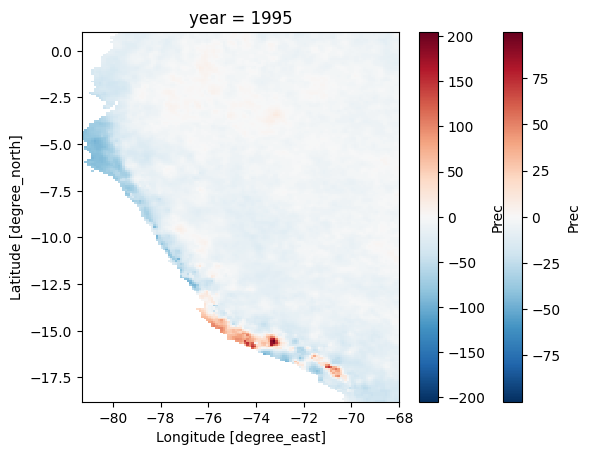

In [34]:
filtro= pisco1.sel(time=slice('1981-01-01T12:00:00.000000000','2011-12-31T12:00:00.000000000'))
prec_niño= filtro.resample(time="M").mean() #agrupando por mes
acumulado = prec_niño.groupby('time.year').sum('time') #suma anual
promedio_treinta_anios = acumulado.mean(dim='year') #promedio 30años
acumulado_1995 = acumulado.sel(year=[1995])
acumulado_1996 = acumulado.sel(year=[1996])
anomalia_1995 = ((acumulado_1995 - promedio_treinta_anios)/promedio_treinta_anios)*100
anomalia_1996 = ((acumulado_1996 - promedio_treinta_anios)/promedio_treinta_anios)*100
anomalia_1996.Prec.plot()
anomalia_1995.Prec.plot()

<ipython-input-38-0e130443d003>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


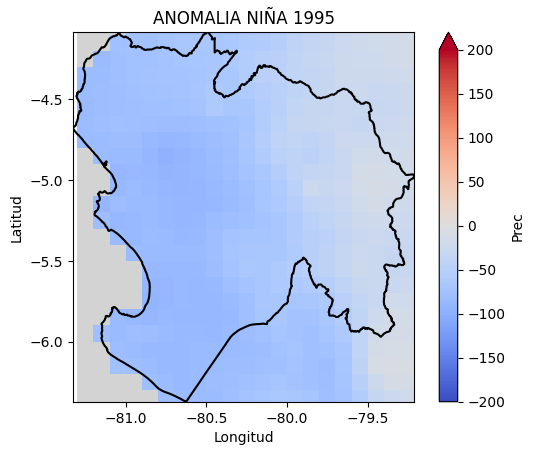

In [38]:
fig, ax = plt.subplots()

# Definir el rango de colores y la escala de colores
cmap = plt.cm.get_cmap('coolwarm')
cmap.set_bad(color='lightgray')

# Ajustar los límites de color
cbar_min = -200
cbar_max =200

# Graficar los datos con la escala de colores modificada
anomalia_1995['Prec'].plot(cmap=cmap, vmin=cbar_min, vmax=cbar_max)

# Agregar los límites del shapefile
shp_exp_piura.boundary.plot(ax=ax, color=None, edgecolor='black', linewidth=1.5)

ax.set_xlim(shp_exp_piura.total_bounds[0], shp_exp_piura.total_bounds[2])
ax.set_ylim(shp_exp_piura.total_bounds[1], shp_exp_piura.total_bounds[3])

ax.set_title("ANOMALIA NIÑA 1995")


ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")


# Mostrar el gráfico
plt.show()

<ipython-input-37-384dd270468b>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


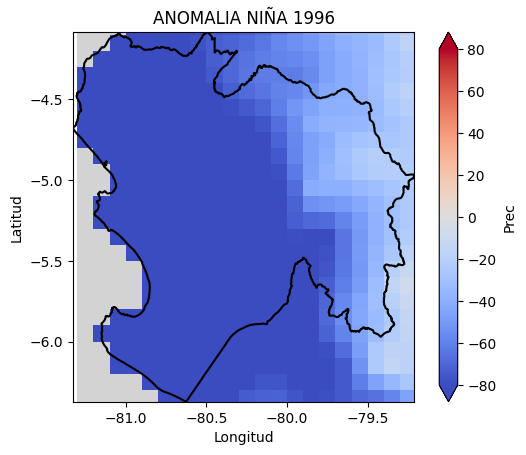

In [37]:
ig, ax = plt.subplots()

# Definir el rango de colores y la escala de colores
cmap = plt.cm.get_cmap('coolwarm')
cmap.set_bad(color='lightgray')

# Ajustar los límites de color
cbar_min = -80
cbar_max =80

# Graficar los datos con la escala de colores modificada
anomalia_1996['Prec'].plot(cmap=cmap, vmin=cbar_min, vmax=cbar_max)

# Agregar los límites del shapefile
shp_exp_piura.boundary.plot(ax=ax, color=None, edgecolor='black', linewidth=1.5)

ax.set_xlim(shp_exp_piura.total_bounds[0], shp_exp_piura.total_bounds[2])
ax.set_ylim(shp_exp_piura.total_bounds[1], shp_exp_piura.total_bounds[3])

ax.set_title("ANOMALIA NIÑA 1996")


ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")


# Mostrar el gráfico
plt.show()

In [ ]:
prom_ppt = prec_niño.groupby('time.month').mean('time') #calculo prom mensual todos los años
prom_ppt